In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_ice = pd.read_csv("icecream2.csv")

df_ice

,year,month,icecream
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<AxesSubplot:>

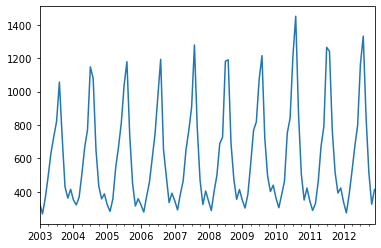

In [5]:
import pandas as pd

# 月ごと
y = pd.Series(df_ice.icecream.values, index=pd.date_range('2003-1', periods=len(df_ice), freq='M'))
y.plot()

In [6]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

# トレンド項あり(2次まで)，定数項ありの場合
ctt = stattools.adfuller(y[:100], regression="ctt")
# トレンド項あり(1次)，定数項ありの場合
ct = stattools.adfuller(y[:100], regression="ct")
# トレンド項なし，定数項ありの場合
c = stattools.adfuller(y[:100], regression="c")
# トレンド項なし，定数項なしの場合
nc = stattools.adfuller(y[:100], regression="nc")
print('ctt:')
print(ctt)
print('ct:')
print(ct)
print('c:')
print(c)
print('nc:')
print(nc)

ctt:
(-3.3089558508822234, 0.16922448619685926, 11, 88, {'1%': -4.507929662788786, '5%': -3.9012866601709244, '10%': -3.595623127758734}, 993.4892589484145)
ct:
(-1.7145601999710802, 0.7444294601457546, 11, 88, {'1%': -4.065513968057382, '5%': -3.4616143302732905, '10%': -3.156971502864388}, 1002.5847722693204)
c:
(-0.6539247687694234, 0.8583259363632656, 11, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, 1003.5884336394024)
nc:
(1.631094917975906, 0.9751761218376865, 11, 88, {'1%': -2.5916151807851238, '5%': -1.944440985689801, '10%': -1.614115063626972}, 1002.1878264328066)


<AxesSubplot:>

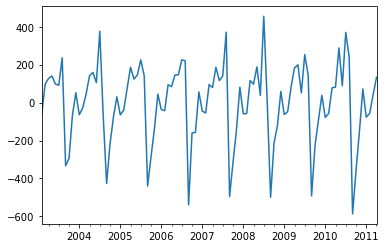

In [7]:
y_diff = y.diff()[:100].dropna()
y_diff.plot()

In [8]:
y_diff.count()

99

In [9]:
from statsmodels.tsa import stattools

# 次数選択の指標にAICとBICを選択
info_criteria = stattools.arma_order_select_ic(y_diff, ic=['aic', 'bic'])
# AICとBICが最小になる次数をそれぞれ表示
info_criteria.aic_min_order, info_criteria.bic_min_order

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

((2, 2), (2, 2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<BarContainer object of 99 artists>

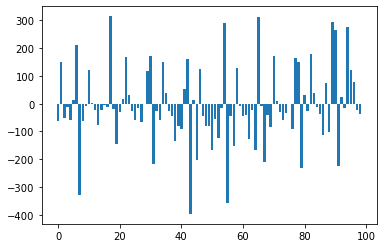

In [11]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y_diff, (4, 2))
results = model.fit()

res = results.resid
plt.bar(range(len(res)), res)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


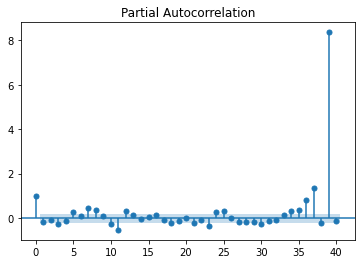

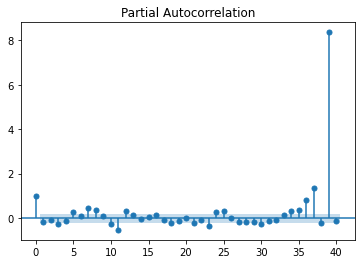

In [12]:
tsaplots.plot_pacf(res, lags=40)

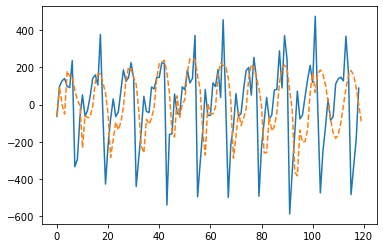

In [14]:
import numpy as np

plt.plot(y.diff().dropna().values, label="observation")
plt.plot(np.hstack([y_diff[:2], 
                    results.fittedvalues, 
                    results.predict(99-2, 115, dynamic=True)]), 
         '--', label="forecast")